### Problem 1
(1)

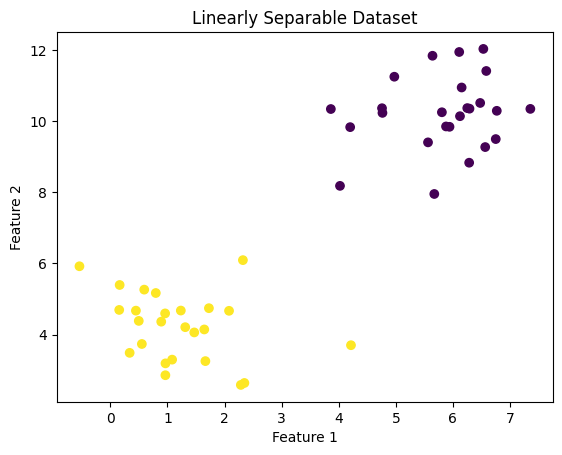

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(42)

x, y = datasets.make_blobs(n_samples = 50, centers = 2, n_features = 2, center_box = (0, 10), cluster_std = 1, random_state = 1247)
y = np.where(y == 0, -1, 1)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

(2)

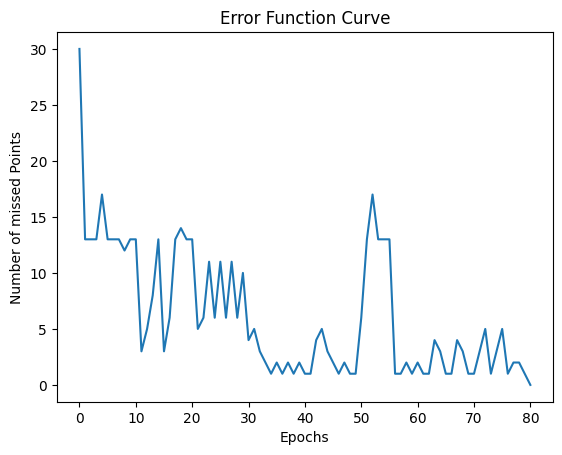

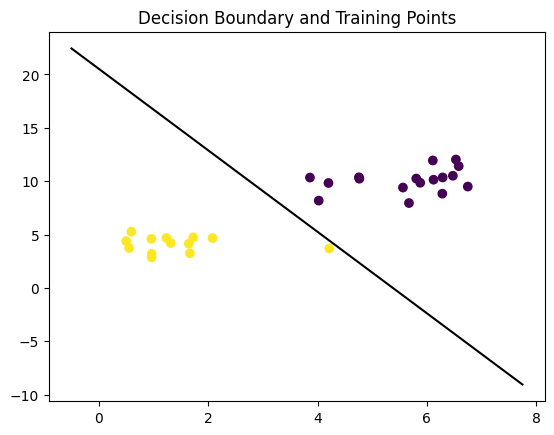

In [2]:
def batch_perceptron(x_train, y_train, learning_rate=0.01, epochs=100, batch_size=x_train.shape[0]):
    w = np.array([0,0])
    b = 0
    
    errors = []
    
    for _ in range(epochs):
        missed = []
        num_error = 0
        
        for i in range(batch_size):
            if y_train[i] * (np.dot(x_train[i], w) + b) <= 0:
                missed.append((x_train[i], y_train[i]))
                num_error += 1
                
        for x_i, y_i in missed:
            w = w + learning_rate * y_i * x_i
            b = b + learning_rate * y_i
        
        errors.append(num_error)
        
        if num_error == 0:
            break
    
    return w, b, errors


w, b, errors = batch_perceptron(x_train, y_train, learning_rate = 0.01, epochs = 100)

plt.figure("Figure 1")
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Number of missed Points')
plt.title('Error Function Curve')
plt.show()

# x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
# y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
# z = z.reshape(xx.shape)


x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min_line = -(b + w[0] * x_min) / w[1]
y_max_line = -(b + w[0] * x_max) / w[1]

plt.figure("Figure 2")
# plt.contour(xx, yy, z, levels = [0], colors='black')
plt.plot([x_min, x_max], [y_min_line, y_max_line], 'k-', label='Decision Boundary')
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.title('Decision Boundary and Training Points')
plt.show()

(3)

Batch Perceptron Accuracy: 100.00%
Batch Perceptron Error rate: 0.00%


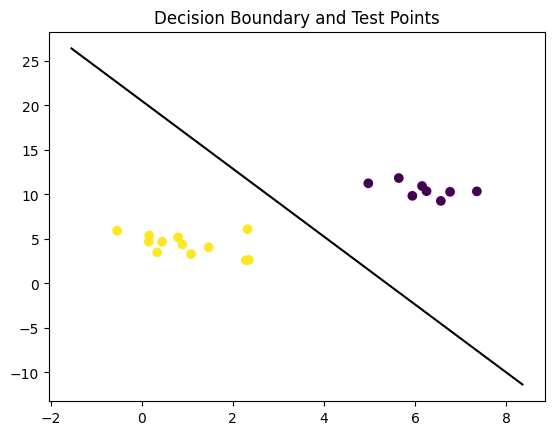

In [3]:
def run_perceptron(x, w, b):
    return np.where(np.dot(x, w) + b > 0, 1, -1)

y_pred = run_perceptron(x_test, w, b)

accuracy = np.mean(y_pred == y_test)
error_rate = 1 - accuracy

print(f"Batch Perceptron Accuracy: {accuracy * 100:.2f}%")
print(f"Batch Perceptron Error rate: {error_rate * 100:.2f}%")

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min_line = -(b + w[0] * x_min) / w[1]
y_max_line = -(b + w[0] * x_max) / w[1]

# plt.contour(xx, yy, z, levels=[0], colors='black')
plt.plot([x_min, x_max], [y_min_line, y_max_line], 'k-', label='Decision Boundary')
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.title('Decision Boundary and Test Points')
plt.show()

(4)

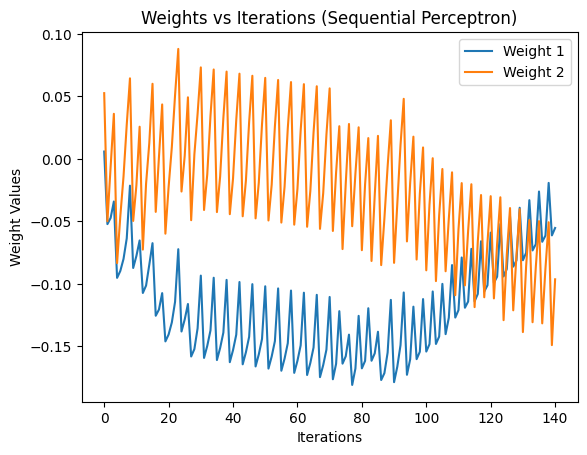

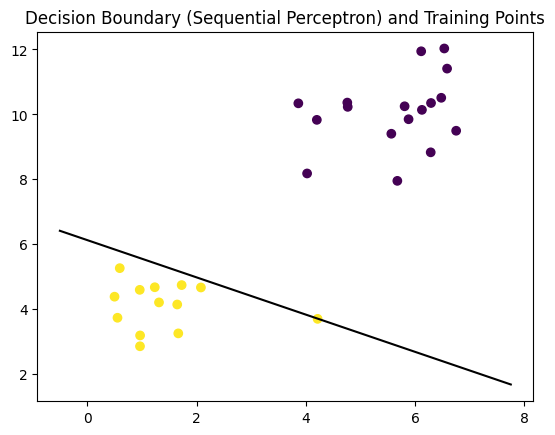

In [4]:
def sequential_perceptron(x_train, y_train, learning_rate = 0.01, epochs = 100):
    w = np.array([0,0])
    b = 0
    weights = []
    
    for _ in range(epochs):
        for i in range(x_train.shape[0]):
            if y_train[i] * (np.dot(x_train[i], w) + b) <= 0:
                w = w + learning_rate * y_train[i] * x_train[i]
                b = b + learning_rate * y_train[i]
                weights.append((w.copy(), b))
        
        predictions = np.sign(np.dot(x_train, w) + b)
        if np.all(predictions == y_train):
            break
    
    return w, b, weights

w, b, w_h = sequential_perceptron(x_train, y_train, learning_rate = 0.01, epochs = 100)

weights_array = np.array([w for w, _ in w_h])

plt.figure("Figure 1")
plt.plot(weights_array[:, 0], label="Weight 1")
plt.plot(weights_array[:, 1], label="Weight 2")
plt.xlabel('Iterations')
plt.ylabel('Weight Values')
plt.title('Weights vs Iterations (Sequential Perceptron)')
plt.legend()
plt.show()

# z_seq = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
# z_seq = z_seq.reshape(xx.shape)

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min_line_seq = -(b + w[0] * x_min) / w[1]
y_max_line_seq = -(b + w[0] * x_max) / w[1]

plt.figure("Figure 2")
# plt.contour(xx, yy, z_seq, levels=[0], colors = 'black')
plt.plot([x_min, x_max], [y_min_line_seq, y_max_line_seq], 'k-', label='Decision Boundary')
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.title('Decision Boundary (Sequential Perceptron) and Training Points')
plt.show()

(5)

Sequential Perceptron Accuracy: 95.00%
Sequential Perceptron Error Rate: 5.00%


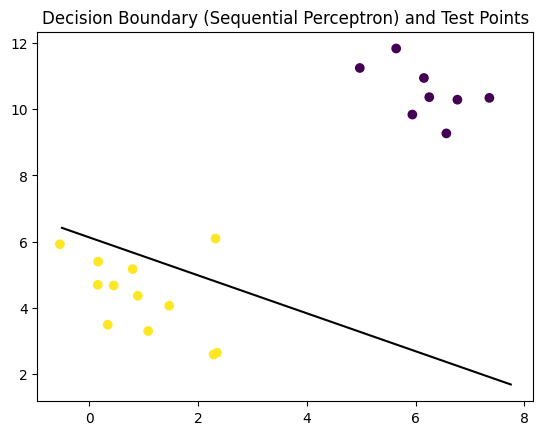

In [5]:
y_pred_seq = run_perceptron(x_test, w, b)

accuracy_seq = np.mean(y_pred_seq == y_test)
error_rate_seq = 1 - accuracy_seq

print(f"Sequential Perceptron Accuracy: {accuracy_seq * 100:.2f}%")
print(f"Sequential Perceptron Error Rate: {error_rate_seq * 100:.2f}%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min_line = -(b + w[0] * x_min) / w[1]
y_max_line = -(b + w[0] * x_max) / w[1]

# plt.contour(xx, yy, z_seq, levels=[0], colors='black')
plt.plot([x_min, x_max], [y_min_line, y_max_line], 'k-', label='Decision Boundary')
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.title('Decision Boundary (Sequential Perceptron) and Test Points')
plt.show()

(6): To be filled.

### Problem 2
Part a:

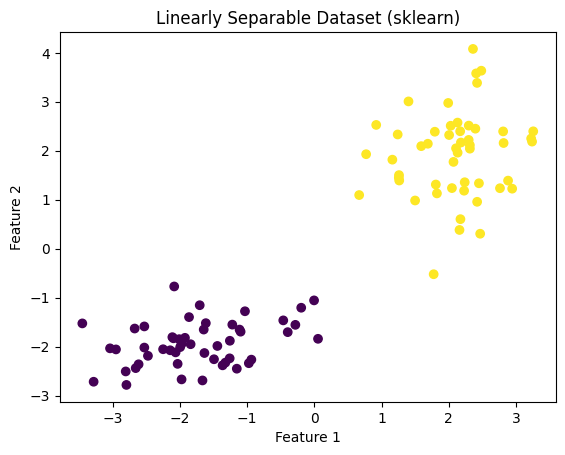

Accuracy of sklearn Perceptron: 100.00%


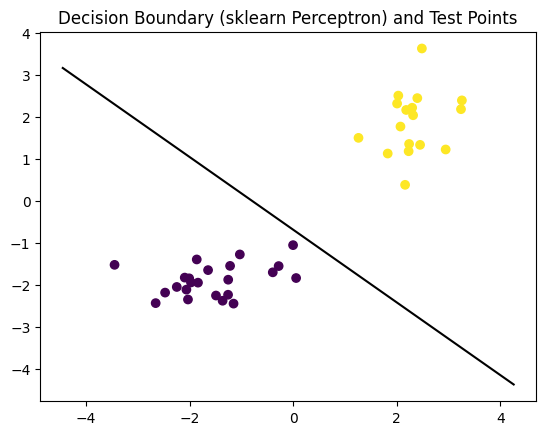

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt


# part a

x, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, class_sep = 2, random_state = 1247)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.title('Linearly Separable Dataset (sklearn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

model = Perceptron()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of sklearn Perceptron: {accuracy * 100:.2f}%")

w = model.coef_[0]
b = model.intercept_[0]

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min_line = -(b + w[0] * x_min) / w[1]
y_max_line = -(b + w[0] * x_max) / w[1]

# x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
# y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
# z = z.reshape(xx.shape)

# plt.contour(xx, yy, z, levels=[0], colors = 'black')
plt.plot([x_min, x_max], [y_min_line, y_max_line], 'k-', label='Decision Boundary')
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.title('Decision Boundary (sklearn Perceptron) and Test Points')
plt.show()

Part b: 

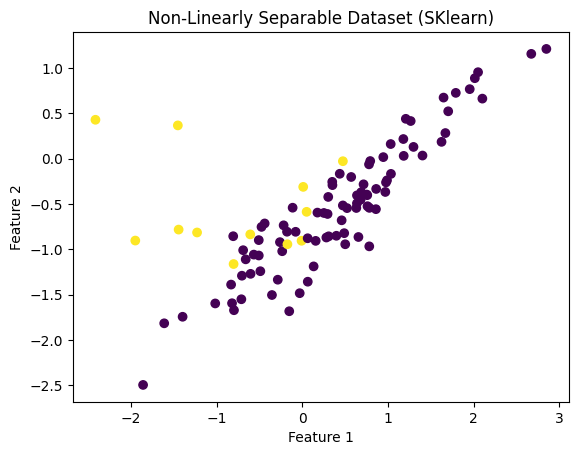

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.50      0.40      0.44         5

    accuracy                           0.88        40
   macro avg       0.71      0.67      0.69        40
weighted avg       0.86      0.88      0.87        40

Confusion Matrix:

[[33  2]
 [ 3  2]]


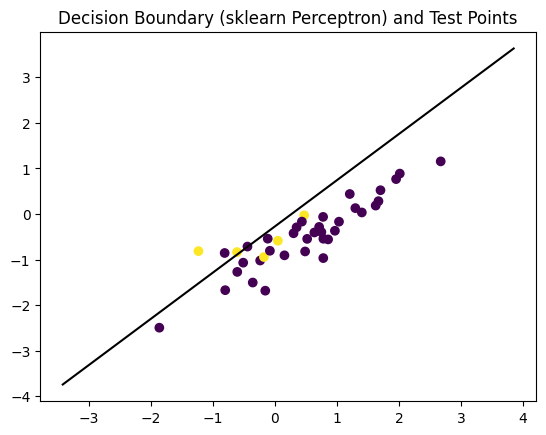

In [7]:
x, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, class_sep = 0.5, flip_y = 0.1, weights = [0.9, 0.1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.title('Non-Linearly Separable Dataset (SKlearn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


model = Perceptron()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

w = model.coef_[0]
b = model.intercept_[0]

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min_line = -(b + w[0] * x_min) / w[1]
y_max_line = -(b + w[0] * x_max) / w[1]

# x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
# y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
# z = z.reshape(xx.shape)


# plt.contour(xx, yy, z, levels=[0], colors = 'black')
plt.plot([x_min, x_max], [y_min_line, y_max_line], 'k-', label='Decision Boundary')
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.title('Decision Boundary (sklearn Perceptron) and Test Points')
plt.show()